In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

db = pd.read_csv('DiZyme.csv')
di2 = {'TMB':1.0, 'H2O2':2.0, 'ABTS': 3.0, 'OPD': 4.0, 'DAB':5.0, 'BA':6.0}
db['Subtype'].replace(di2, inplace=True)

x = db.loc[:,'Syngony':'volume'].values
y = db.loc[:,'Kcat'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [2]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_train = np.log10(y_train)
y_test = np.log10(y_test)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, min_samples_leaf=1, criterion='mae')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)

Q2: -0.8964489437531723
r2_test: 0.7927983727836716
MAE_test: 0.8280477230777615
MSE_test: 1.1904617801123654
RMSE_test: 1.0910828475016758
r2_train: 0.9458112260935312
MAE_train: 0.36925566588218833
MSE_train: 0.31198402222590754
RMSE_train: 0.5585552991655415


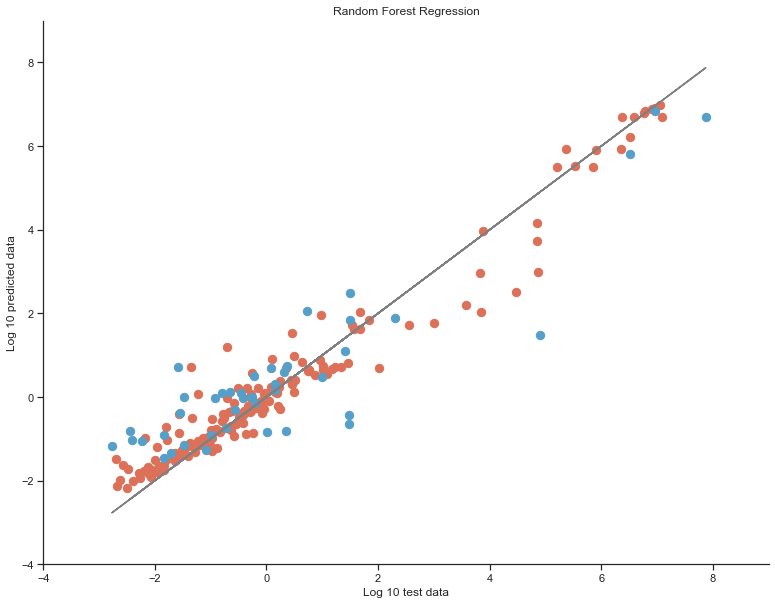

In [4]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                           scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
plt.scatter(y_test, y_pred, color='#569FC9',s=70)
plt.plot(y_test, y_test, color='gray')
plt.title('Random Forest Regression')
plt.xlabel('Log 10 test data')
plt.ylabel('Log 10 predicted data')
plt.xlim(-4, 9)
plt.ylim(-4, 9)
plt.show()
#ax.figure.savefig("regKcat.png",transparent=True)

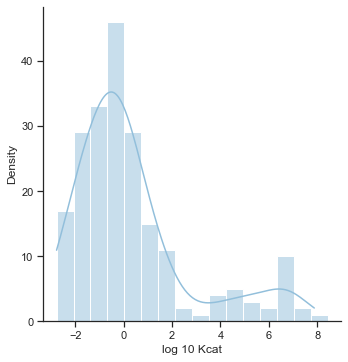

In [5]:
y_d=np.log10(y)
g=sns.displot(x=y_d,kde=True, color='#92BFDB', binwidth=0.7)
g.set_axis_labels('log 10 Kcat', 'Density')
#g.savefig("KcatDens.png",transparent=True)